# Part 1: Network Architecture

In [29]:
import math

1) To figure out the number of trainable parameters in the model, first need to calculate the dimensions of the parameters:

In [31]:
n_v = 250 # num. of features (words)
n_e = 16 # dimensions of word embedding
n_w = 3 # num. of input words
n_h = 128 # num. of hidden units

embed_to_hid_weights_params = (n_w * n_e) * n_h
hid_to_output_weights_params = n_h * n_v
hid_bias_params = 1 * n_h
output_bias_params = 1 * n_v

print(f'The number of parameters in this model is: {embed_to_hid_weights_params + hid_to_output_weights_params + hid_bias_params + output_bias_params}')
print(f'The part of the model with largest number of parameters: {max([embed_to_hid_weights_params, hid_to_output_weights_params, hid_bias_params,  output_bias_params])}')

The number of parameters in this model is: 38522
The part of the model with largest number of parameters: 32000


2) For an n-gram model, that has 4 words (ie. 4-gram), if we stored all possible combinations of words, the number of entries is:

In [34]:
print(math.factorial(n_v))

3232856260909107732320814552024368470994843717673780666747942427112823747555111209488817915371028199450928507353189432926730931712808990822791030279071281921676527240189264733218041186261006832925365133678939089569935713530175040513178760077247933065402339006164825552248819436572586057399222641254832982204849137721776650641276858807153128978777672951913990844377478702589172973255150283241787320658188482062478582659808848825548800000000000000000000000000000000000000000000000000000000000000


# Part 2: Training the model

In [3]:
import pickle
import language_model # Assignment
import checking # Assignment checker

In [4]:
# Look at data
data_file = open('data.pk', 'rb')
data = pickle.load(data_file, encoding='latin1')
data_file.close()

print(data)

{'vocab': ['all', 'set', 'just', 'show', 'being', 'money', 'over', 'both', 'years', 'four', 'through', 'during', 'go', 'still', 'children', 'before', 'police', 'office', 'million', 'also', 'less', 'had', ',', 'including', 'should', 'to', 'only', 'going', 'under', 'has', 'might', 'do', 'them', 'good', 'around', 'get', 'very', 'big', 'dr.', 'game', 'every', 'know', 'they', 'not', 'world', 'now', 'him', 'school', 'several', 'like', 'did', 'university', 'companies', 'these', 'she', 'team', 'found', 'where', 'right', 'says', 'people', 'house', 'national', 'some', 'back', 'see', 'street', 'are', 'year', 'home', 'best', 'out', 'even', 'what', 'said', 'for', 'federal', 'since', 'its', 'may', 'state', 'does', 'john', 'between', 'new', ';', 'three', 'public', '?', 'be', 'we', 'after', 'business', 'never', 'use', 'here', 'york', 'members', 'percent', 'put', 'group', 'come', 'by', '$', 'on', 'about', 'last', 'her', 'of', 'could', 'days', 'against', 'times', 'women', 'place', 'think', 'first', 'amo

In [5]:
# Check gradients to make sure loss derivative and backprop are fine.
checking.check_gradients()

The loss derivative looks OK.
Checking  output_bias
The gradient for output_bias looks OK.
Checking  hid_bias
The gradient for hid_bias looks OK.
Checking  hid_to_output_weights
The gradient for hid_to_output_weights looks OK.
Checking  embed_to_hid_weights
The gradient for embed_to_hid_weights looks OK.
Checking  word_embedding_weights
The gradient for word_embedding_weights looks OK.


In [6]:
# Create and train model
distributed_representation_dim = 16
hidden_units = 128

model = language_model.train(16, 128)


Epoch 1
Batch 100 Train CE 4.545
Batch 200 Train CE 4.456
Batch 300 Train CE 4.442
Batch 400 Train CE 4.437
Batch 500 Train CE 4.418
Batch 600 Train CE 4.410
Batch 700 Train CE 4.458
Batch 800 Train CE 4.433
Batch 900 Train CE 4.434
Batch 1000 Train CE 4.377
Running validation...
Validation cross-entropy: 4.425
Batch 1100 Train CE 4.391
Batch 1200 Train CE 4.302
Batch 1300 Train CE 4.216
Batch 1400 Train CE 4.164
Batch 1500 Train CE 4.071
Batch 1600 Train CE 4.088
Batch 1700 Train CE 4.090
Batch 1800 Train CE 4.004
Batch 1900 Train CE 4.020
Batch 2000 Train CE 4.000
Running validation...
Validation cross-entropy: 3.970
Batch 2100 Train CE 3.988
Batch 2200 Train CE 3.893
Batch 2300 Train CE 3.868
Batch 2400 Train CE 3.849
Batch 2500 Train CE 3.828
Batch 2600 Train CE 3.737
Batch 2700 Train CE 3.736
Batch 2800 Train CE 3.660
Batch 2900 Train CE 3.603
Batch 3000 Train CE 3.563
Running validation...
Validation cross-entropy: 3.564
Batch 3100 Train CE 3.548
Batch 3200 Train CE 3.504
Batch 

# Part 3: Analysis

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  250 ...
Mean value of sigma:  1.1360113267570429
Iteration  10 : error is  13.27199127764716
Iteration  20 : error is  13.015665716224111
Iteration  30 : error is  14.431909208394197
Iteration  40 : error is  14.683776487755377
Iteration  50 : error is  14.387473622837017
Iteration  60 : error is  14.810644729554923
Iteration  70 : error is  14.309393638626073
Iteration  80 : error is  14.467844161853819
Iteration  90 : error is  14.425021986770023
Iteration  100 : error is  14.14960653213638
Iteration  110 : error is  1.8597657090414526
Iteration  120 : error is  1.3275800006057126
Iteration  130 : error is  1.0971947361512357
Iteration  140 : error is  0.9849653420266818
Iteration  150 : error is  0.8818377809174139
Iteration  160 : error is  0.8224881125388462
Iteration  170 : error is  0.797704692270606
Iteration  180 : error is  0.7702695282104072
Iteration  190 : error is  0.7

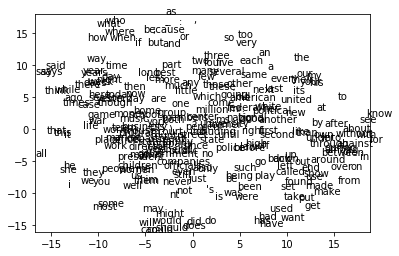

In [7]:
# Plot TSNE
model.tsne_plot()

1) test out a word combination

In [10]:

model.predict_next_word('companies','want','more')

companies want more . Prob: 0.44227
companies want more time Prob: 0.12828
companies want more than Prob: 0.07858
companies want more money Prob: 0.05616
companies want more to Prob: 0.05210
companies want more , Prob: 0.04798
companies want more more Prob: 0.02675
companies want more ? Prob: 0.02656
companies want more children Prob: 0.01988
companies want more or Prob: 0.01272


2) Words that are grammatically similar seem to be clustered. For example, "she", "he", and "I". There doesn't seem to be any strong clustering with respect to semantics, but there is some. For example, "people" relates closest to "women", "children" and "us".

In [21]:
model.display_nearest_words('she')

he: 0.7820804885456604
united: 2.366551651368451
they: 2.6977152594651286
we: 2.883513607740695
i: 2.932646835906675
its: 2.989929629501051
white: 3.015994233350521
john: 3.0308254192648434
government: 3.0737900050746605
you: 3.124640894525029


In [18]:
model.display_nearest_words('people')

women: 1.5187095554629388
children: 1.707750414799329
us: 2.1018142204625017
officials: 2.132434255718013
companies: 2.167790071838781
director: 2.175279441175138
me: 2.180691288142348
man: 2.1904096208637434
government: 2.203386009545124
west: 2.2094524269474523


3) The words "new" and "york" aren't close because 
- they are not likely, grammatically, to be in similar positions.
- Semantically, they are different. You can see that as the closest word to "new" is "old"

In [22]:
model.display_nearest_words('new')

old: 2.932806061155875
american: 2.935283992144499
back: 3.1830708319388057
own: 3.2494659680270614
about: 3.313915926234961
big: 3.324562115725723
show: 3.3480734830385503
next: 3.361208469556825
national: 3.3851881476210064
same: 3.385816206004517


4) The distance between "university" and "governement" is closer because they're both semantically closer in the fact they are both nouns and establisments. Where as "political" is not an establishment and also can be used as a noun or adjective.

In [25]:
print(f'Distance of government, political: {model.word_distance("government", "political")}\nDistance of government, university: {model.word_distance("government", "university")}')

Distance of government, political: 1.3141269693870212
Distance of government, university: 1.2257999474720518
